In [1]:
import json
import math
import os
from glob import glob 
from tqdm import tqdm
from PIL import Image
import cv2 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.applications import VGG16,VGG19
from keras.utils.np_utils import to_categorical
from keras.layers import  Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [2]:
input_path = "btData/"
train_path = input_path +"Train/"
test_path = input_path +"Test/"
val_path = input_path +"Val/"

batch_size=21

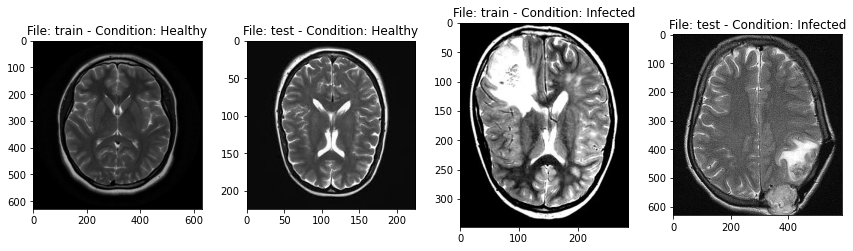

In [3]:
fig, ax = plt.subplots(1,4, figsize=(12,12))
ax = ax.ravel()
plt.tight_layout()
for i, _set in enumerate(['train', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/no/'+os.listdir(set_path+'/no')[0]),cmap='gray')
    ax[i].set_title('File: {} - Condition: Healthy'.format(_set))
    ax[i+2].imshow(plt.imread(set_path+'/yes/'+os.listdir(set_path+'/yes')[0]),cmap='gray')
    ax[i+2].set_title('File: {} - Condition: Infected'.format(_set))

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest' )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(256, 256),
        batch_size=21,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(256, 256),
        batch_size=21,
        class_mode='binary')

Found 2349 images belonging to 2 classes.
Found 511 images belonging to 2 classes.


In [5]:

model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu",padding="same",input_shape=(256,256,3)))
model.add(Conv2D(32, (2,2), activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation="relu",padding="same"))
model.add(Conv2D(64, (3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation="relu",padding="same"))
model.add(Conv2D(128, (3,3), activation="relu",padding="same"))
model.add(Conv2D(128, (3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation="relu",padding="same"))
model.add(Conv2D(128, (3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation="relu",padding="same"))
model.add(Conv2D(256, (3,3), activation="relu",padding="same"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      4128      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        3

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer= RMSprop(learning_rate=0.0001,decay=1e-6),
              metrics=['acc'])

In [7]:
history = model.fit_generator(
train_generator,
steps_per_epoch=train_generator.samples//batch_size,
epochs=25,
validation_data=validation_generator,
validation_steps=validation_generator.samples//batch_size
)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
111/111 [==============================] - 275s 2s/step - loss: 0.6501 - acc: 0.6271 - val_loss: 0.6288 - val_acc: 0.7044
Epoch 2/25
111/111 [==============================] - 277s 2s/step - loss: 0.5755 - acc: 0.7045 - val_loss: 0.5098 - val_acc: 0.7460
Epoch 3/25
111/111 [==============================] - 275s 2s/step - loss: 0.5562 - acc: 0.7272 - val_loss: 0.4959 - val_acc: 0.7778
Epoch 4/25
111/111 [==============================] - 276s 2s/step - loss: 0.5251 - acc: 0.7569 - val_loss: 0.5644 - val_acc: 0.7321
Epoch 5/25
111/111 [==============================] - 276s 2s/step - loss: 0.5115 - acc: 0.7444 - val_loss: 0.4652 - val_acc: 0.7897
Epoch 6/25
111/111 [==============================] - 275s 2s/step - loss: 0.4911 - acc: 0.7603 - val_loss: 0.5136 - val_acc: 0.7480
Epoch 7/25
111/111 [==============================] - 275s 2s/step - loss: 0.4860 - acc: 0.7861 - val_loss: 0.4683 - val_acc: 

<function matplotlib.pyplot.show(close=None, block=None)>

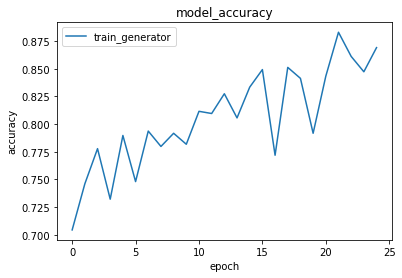

In [8]:
plt.plot(history.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_generator','validation_generator'], loc='upper left')
plt.show

In [9]:
model.save("cnn-tumor-0.8690.h5")

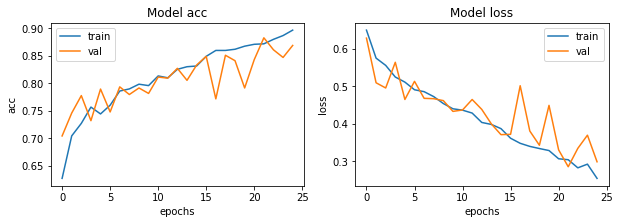

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['acc', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])   
